In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv(r'C:\Users\Deeksha\Desktop\dataset.csv')
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [72]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [73]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [74]:
import re

In [75]:
def cleantext(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'@[A-Za-zA-Z0-9]+','',text)
    text=re.sub(r'@[A-Za-z]+','',text)
    text=re.sub(r'@[-)]+','',text)
    text=re.sub(r'_[A-Za-z0-9]+','',text)
    text=re.sub(r'__ [A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'http?:\/\/\S+','',text)
    text=re.sub(r'&[a-z;]+','',text)
    return text

In [76]:
df['SentimentText']=df['SentimentText'].apply(cleantext)
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,seems like a repeating problem hope you're...
99985,99997,1,we both replied to each other over different ...
99986,99998,0,ya i thought so
99987,99999,1,Yes. Yes. I'm glad you had more fun with me.


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(df['SentimentText'].values,df['Sentiment'].values,test_size=0.30)

In [79]:
print('Sentiment Text:-',x_train[0])
print('Sentiment:-',y_train[0])

Sentiment Text:-  Going to London Expo this weekend  Can't wait !
Sentiment:- 1


In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [81]:
max_voc=20000000
tokenizer=Tokenizer(num_words=max_voc)
tokenizer.fit_on_texts(x_train)

In [82]:
wordindex=tokenizer.word_index
l=len(wordindex)
print('The size of dataset vocabulary is:',l)

The size of dataset vocabulary is: 45275


In [83]:
train_sequence=tokenizer.texts_to_sequences(x_train)
test_sequence=tokenizer.texts_to_sequences(x_test)
print('Training Sequence',train_sequence[0])
print('Testing Sequence',test_sequence[0])

Training Sequence [71, 3, 708, 4943, 37, 219, 77, 150]
Testing Sequence [21435, 1336, 1, 3809, 91, 11, 8, 220, 61, 21435, 181, 31, 158, 218, 59, 230]


In [84]:
pad_train=pad_sequences(train_sequence)
t=pad_train.shape[1]
print('Length of train sequence:- ',t)

Length of train sequence:-  40


In [85]:
pad_test=pad_sequences(test_sequence, maxlen=t)
T=pad_test.shape[1]
print('Length of test sequence:- ',T)

Length of test sequence:-  40


In [98]:
from tensorflow.keras.layers import Input,Dense,Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [87]:
D=20
M=15

i=Input(shape=(t,))
x=Embedding(l+1,D)(i)

x=GlobalMaxPooling1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)

In [88]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
r= model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=2)

Epoch 1/2
2188/2188 [==============================] - 50s 22ms/step - loss: 0.5315 - accuracy: 0.7238 - val_loss: 0.4867 - val_accuracy: 0.7609
Epoch 2/2
2188/2188 [==============================] - 51s 23ms/step - loss: 0.4268 - accuracy: 0.7995 - val_loss: 0.4854 - val_accuracy: 0.7646


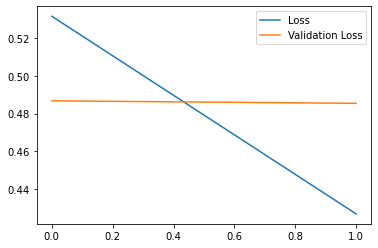

In [90]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()

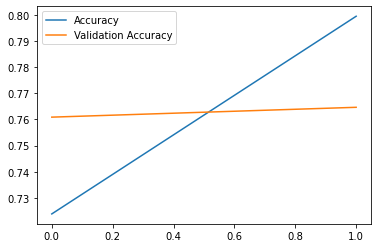

In [91]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [92]:
def predict_sentiment(text):
    text_sequence=tokenizer.texts_to_sequences(text)
    text_pad=pad_sequences(text_sequence,maxlen=t)
    predicted_sentiment=model.predict(text_pad).round()
    if predicted_sentiment==1.0:
        return(print('Happy'))
    else:
        return(print('Sad'))

In [96]:
text=['Feeling very happy.']
predict_sentiment(text)

Happy


In [97]:
text=['Today, I am feeling unwell.']
predict_sentiment(text)

Sad
